# 建模架構
- 匯入資料
- 切分訓練與驗證資料集
- 資料檢視
    - 探索性分析
- 資料前處理
    - 變數工程
    - 遺漏值補值
- 模型建置
    - 訓練模型與調整參數
    - 信效度評估
- 匯出預測結果

In [1]:
# 載入相關套件
import pandas as pd #資料清理
import numpy as np #資料清理
import matplotlib.pyplot as plt #繪圖
import seaborn as sns #繪圖
pd.options.mode.chained_assignment = None

# 匯入資料

此份資料為Kaggle上所提供的[公開資料](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset)，內容為台灣某銀行提供的信用卡客戶壞帳與消費行為資料。然而，為了使這次的介紹更為流暢，我有部分修改資料內容，若有興趣檢視原始資料可在Kaggle上查看。
<br>
<br>

詳細的資料欄位定義如下：<br>

__目標變數 :__<br>
DEFAULT : 下個月(2005年10月)是否壞帳 (1=yes, 0=no)<br>

__個人特徵變數__:<br>
ID: 客戶ID<br>
SEX: 性別 (1=男, 2=女)<br>
EDUCATION: 教育程度 (1=碩士以上, 2=大學, 3=高中, 4=其他, 5=未知, 6=未知)<br>
MARRIAGE: 婚姻狀態(1=已婚, 2=未婚, 3=其他)<br>
AGE: 年齡<br>

__信用卡相關變數__:<br>
額度變數:<br>
    LIMIT_BAL: 信用卡額度(NT dollar)<br>

延遲付款變數:<br>
    PAY_0: 2005年9月的付款情況 (0=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)<br>
    PAY_2: 2005年8月的付款情況 (定義同上)<br>
    PAY_3: 2005年7月的付款情況 (定義同上)<br>
    PAY_4: 2005年6月的付款情況 (定義同上)<br>
    PAY_5: 2005年5月的付款情況 (定義同上)<br>
    PAY_6: 2005年4月的付款情況 (定義同上)<br>

帳單金額變數:<br>
    BILL_AMT1: 2005年9月的帳單金額 (NT dollar)<br>
    BILL_AMT2: 2005年8月的帳單金額 (NT dollar)<br>
    BILL_AMT3: 2005年7月的帳單金額 (NT dollar)<br>
    BILL_AMT4: 2005年6月的帳單金額 (NT dollar)<br>
    BILL_AMT5: 2005年5月的帳單金額 (NT dollar)<br>
    BILL_AMT6: 2005年4月的帳單金額 (NT dollar)<br>

付款金額變數:<br>
    PAY_AMT1: 2005年9月的上期付款金額 (NT dollar)<br>
    PAY_AMT2: 2005年8月的上期付款金額 (NT dollar)<br>
    PAY_AMT3: 2005年7月的上期付款金額 (NT dollar)<br>
    PAY_AMT4: 2005年6月的上期付款金額 (NT dollar)<br>
    PAY_AMT5: 2005年5月的上期付款金額 (NT dollar)<br>
    PAY_AMT6: 2005年4月的上期付款金額 (NT dollar)<br>


In [2]:
# 匯入資料
data = pd.read_csv('UCI_Credit_Card_modified.csv')
print(data.shape)
data.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,2,2,1,24,2.0,2.0,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0.0,2.0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0.0,0.0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0.0,0.0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0.0,0.0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
# 確認欄位名稱
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

# 切分訓練與驗證資料集

In [4]:
# 依照 7 : 3 切分訓練與驗證資料集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop(['DEFAULT'], axis = 1), 
                                                    data[['DEFAULT']], 
                                                    test_size=0.3, 
                                                    random_state=99)
# 訓練資料集
train = pd.concat([x_train, y_train], axis = 1)
# 驗證資料集
test = pd.concat([x_test, y_test], axis = 1)

# 資料檢視 - 探索性分析

1. 確認不均情況
2. 變數敘述統計
    1. 排除遺漏變數過多的樣本
    2. 確認須補值變數
3. 單變量分析
    1. 離散型變數
    2. 連續型變數
4. 相關性分析

## 1. 確認不均情況

num of samples : 21000
num of defaults : 4614
0    0.780286
1    0.219714
Name: DEFAULT, dtype: float64


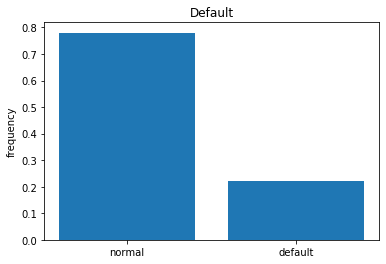

In [7]:
# 訓練樣本
plt.bar(['normal', 'default'], train['DEFAULT'].value_counts()/len(train))
plt.title('Default')
plt.ylabel('frequency')
print('num of samples :', len(train))
print('num of defaults :', sum(train['DEFAULT']))
print(train['DEFAULT'].value_counts()/len(train))

num of samples : 9000
0    0.775333
1    0.224667
Name: DEFAULT, dtype: float64


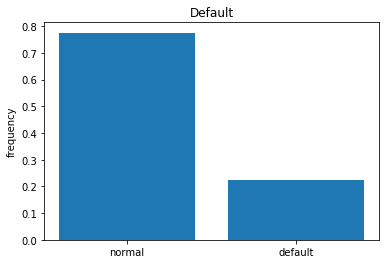

In [8]:
# 驗證樣本
plt.bar(['normal', 'default'], test['DEFAULT'].value_counts()/len(test))
plt.title('Default')
plt.ylabel('frequency')
print('num of samples :', len(test))
print(test['DEFAULT'].value_counts()/len(test))

## 2. 變數敘述統計

In [9]:
# 敘述統計
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,21000.0,14979.165429,8648.375158,1.0,7528.50,14929.5,22491.25,30000.0
LIMIT_BAL,21000.0,166551.238095,128193.506344,10000.0,50000.00,140000.0,240000.00,800000.0
SEX,21000.0,1.601714,0.489557,1.0,1.00,2.0,2.00,2.0
EDUCATION,21000.0,1.848667,0.786968,1.0,1.00,2.0,2.00,6.0
MARRIAGE,21000.0,1.552048,0.522876,0.0,1.00,2.0,2.00,3.0
AGE,21000.0,35.487381,9.207102,21.0,28.00,34.0,41.00,79.0
PAY_0,20998.0,0.355367,0.760075,0.0,0.00,0.0,0.00,8.0
PAY_2,20998.0,0.317649,0.796994,0.0,0.00,0.0,0.00,8.0
PAY_3,21000.0,0.301143,0.780176,0.0,0.00,0.0,0.00,8.0
PAY_4,21000.0,0.255286,0.749761,0.0,0.00,0.0,0.00,8.0


__經由敘述統計的描述，可以發現到三點事項：__
1. 這份資料應該是有特別挑選過，落循比例相對較高
2. 似乎有兩筆資料有遺漏值問題
3. PAY_AMT1變數有部份資料遺漏，須補值

以下再進一步做遺漏值的相關檢視

In [10]:
# 檢視PAY_0之樣本
print(train[train['PAY_0'].isnull()].isnull().sum(0))
train[train['PAY_0'].isnull()]

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        2
PAY_2        2
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    2
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    2
BILL_AMT5    0
BILL_AMT6    2
PAY_AMT1     2
PAY_AMT2     0
PAY_AMT3     2
PAY_AMT4     2
PAY_AMT5     2
PAY_AMT6     2
DEFAULT      0
dtype: int64


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
29199,29200,10000.0,1,2,2,27,NaN,NaN,0,0,...,NaN,7886.0,NaN,NaN,1310.0,NaN,NaN,NaN,NaN,0
17673,17674,320000.0,2,2,2,35,NaN,NaN,0,0,...,NaN,23358.0,NaN,NaN,3300.0,NaN,NaN,NaN,NaN,0


In [11]:
## 排除缺值過多的樣本
train = train[~train['PAY_0'].isnull()]
## 檢驗剩餘樣本
train.isnull().sum()

ID            0
LIMIT_BAL     0
SEX           0
EDUCATION     0
MARRIAGE      0
AGE           0
PAY_0         0
PAY_2         0
PAY_3         0
PAY_4         0
PAY_5         0
PAY_6         0
BILL_AMT1     0
BILL_AMT2     0
BILL_AMT3     0
BILL_AMT4     0
BILL_AMT5     0
BILL_AMT6     0
PAY_AMT1     16
PAY_AMT2      0
PAY_AMT3      0
PAY_AMT4      0
PAY_AMT5      0
PAY_AMT6      0
DEFAULT       0
dtype: int64

## 3. 單變量分析

In [12]:
# 類別型資料
categorical_vars = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [13]:
def draw_histograms(df, variable, h = True):
    temp = df.groupby([variable])[['DEFAULT']].mean()
    if h:
        temp.plot.bar()
        plt.ylabel('Default Rate')
    else :
        temp.plot.barh()
        plt.xlabel('Default Rate') 

([<matplotlib.axis.XTick at 0xfd291d0>, <matplotlib.axis.XTick at 0x109fadb0>],
 <a list of 2 Text xticklabel objects>)

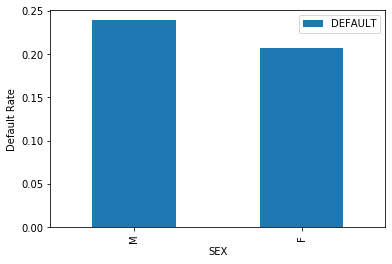

In [14]:
## SEX
draw_histograms(train, 'SEX')
plt.xticks([0, 1], ['M', 'F'])

([<matplotlib.axis.YTick at 0xfd7e5f0>,
 <a list of 6 Text yticklabel objects>)

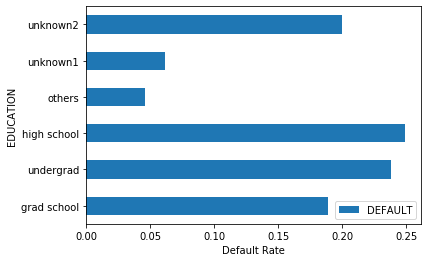

In [15]:
## EDUCATION
draw_histograms(train, 'EDUCATION', h = False)
plt.yticks([0,1,2,3,4,5] , ['grad school', 'undergrad', 'high school', 'others', 'unknown1', 'unknown2'])

教育程度的變數中原本有兩類同名的Unknown值，經分析後發現Unknown1與Unknown2的Default rate有差，故不將兩組資料合併

PAY_0
       count      mean
PAY_0                 
0.0    16272  0.138336
1.0     2504  0.336262
2.0     1905  0.682940
3.0      223  0.735426
4.0       52  0.653846
5.0       15  0.466667
6.0        8  0.500000
7.0        4  0.750000
8.0       15  0.533333
PAY_2
       count      mean
PAY_2                 
0.0    17904  0.161528
1.0       20  0.150000
2.0     2751  0.554707
3.0      221  0.628959
4.0       65  0.523077
5.0       15  0.466667
6.0        5  0.800000
7.0       16  0.562500
8.0        1  0.000000
PAY_3
       count      mean
PAY_3                 
0      18054  0.170599
1          3  0.000000
2       2695  0.516141
3        152  0.592105
4         47  0.489362
5         12  0.500000
6         19  0.578947
7         15  0.800000
8          1  1.000000
PAY_4
       count      mean
PAY_4                 
0      18559  0.178242
1          1  0.000000
2       2204  0.527223
3        124  0.588710
4         44  0.636364
5         27  0.481481
6          5  0.400000
7         

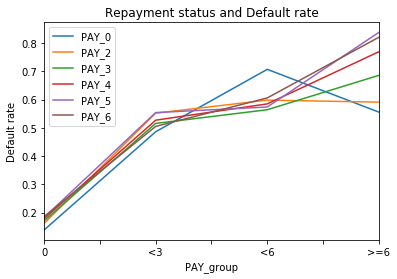

In [16]:
## Repayment status
def gen_pay_group(pay):
    if pay == 0:
        return '0'
    elif pay in [1, 2]:
        return '<3'
    elif pay in [3, 4, 5]:
        return '<6'
    elif pay in [6, 7, 8]:
        return '>=6'
    else:
        return ''
for var in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    print(var)
    print(train.groupby(var)['DEFAULT'].agg(['count', 'mean']))
    temp = train[[var, 'DEFAULT']]
    temp.loc[:, 'PAY_group'] = temp[var].apply(lambda x :gen_pay_group(x))
    temp.groupby(['PAY_group'])['DEFAULT'].mean().plot(label = var)
plt.ylabel('Default rate')
plt.title('Repayment status and Default rate')
plt.legend()

In [17]:
# 數值型資料
continous_variables = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5',
                       'BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4',
                       'PAY_AMT5','PAY_AMT6']

D:\Users\125989\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Users\125989\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


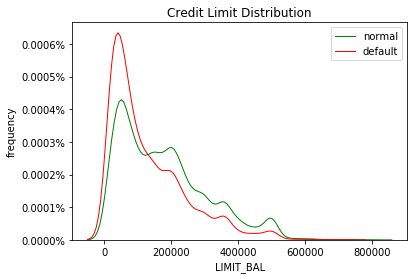

In [18]:
## LIMIT BAL
from matplotlib.ticker import FuncFormatter
class_0 = train.loc[train['DEFAULT'] == 0]["LIMIT_BAL"]
class_1 = train.loc[train['DEFAULT'] == 1]["LIMIT_BAL"]
plt.title('Credit Limit Distribution')
sns.distplot(class_0, hist=False, kde=True,
             bins=25, color = 'green',
             kde_kws={'linewidth': 1}, label = 'normal')
sns.distplot(class_1, hist=False, kde=True,
             bins=25, color = 'red',
             kde_kws={'linewidth': 1}, label = 'default')
plt.legend()
plt.ylabel('frequency')
plt.gca().yaxis.set_major_formatter(FuncFormatter('{0:.4%}'.format))

## 4. 相關性分析

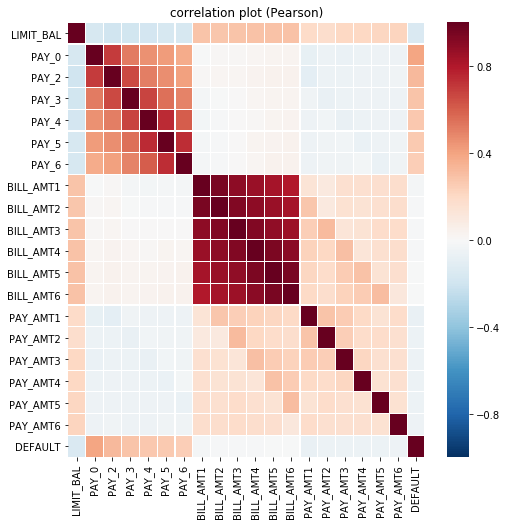

In [17]:
plt.figure(figsize = (8,8))
var = ['LIMIT_BAL','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT']
plt.title('correlation plot (Pearson)')
corr = data[var].corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            linewidths=.1, cmap="RdBu_r", vmax =1 , vmin = -1)

plt.show()

由相關性分析發現到不同月份的帳金具有高度相關(r > 0.8)，進模型時考慮只放最近一期的的帳金變數(BILL_AMT1)

# 資料前處理 - 變數工程

In [18]:
def divind(data, col1, col2):
    result = data[col1]/data[col2]
    result.loc[(data[col1] == 0) & (data[col2] == 0)] = 0
    return result

In [19]:
# 近一個月額度使用情形 = 近一個月帳金/額度 
def gen_limit_use(data_input):
    data_output = data_input.copy()
    data_output['LIMIT_USE1'] = divind(data_output, 'BILL_AMT1', 'LIMIT_BAL')
    return data_output
train = gen_limit_use(train)

In [20]:
# 刷卡金額擴張情形 = 本月帳金/近二(三)個月帳金加總
def gen_bill_exp(data_input):
    data_output = data_input.copy()
    
    data_output['BILL_EXP1_2'] = data_output['BILL_AMT1']/(data_output['BILL_AMT1'] + data_output['BILL_AMT2'])
    data_output.loc[(data_output['BILL_AMT1'] + data_output['BILL_AMT2']) == 0 ,'BILL_EXP1_2'] = 0
    
    data_output['BILL_EXP1_3'] = data_output['BILL_AMT1']/(data_output['BILL_AMT1'] + data_output['BILL_AMT2'] + data_output['BILL_AMT3'])
    data_output.loc[(data_output['BILL_AMT1'] + data_output['BILL_AMT2'] + data_output['BILL_AMT3']) == 0,'BILL_EXP1_3'] = 0
    
    return data_output
train = gen_bill_exp(train)

In [21]:
# 當月繳款比例 = 上月繳款金額/上月帳金
def gen_pay_per(data_input):
    data_output = data_input.copy()
    data_output['PAY_PER1'] = divind(data_output, 'PAY_AMT1', 'BILL_AMT2').replace(np.inf, 1)
    data_output['PAY_PER2'] = divind(data_output, 'PAY_AMT2', 'BILL_AMT3').replace(np.inf, 1)
    data_output['PAY_PER3'] = divind(data_output, 'PAY_AMT3', 'BILL_AMT4').replace(np.inf, 1)
    data_output['PAY_PER4'] = divind(data_output, 'PAY_AMT4', 'BILL_AMT5').replace(np.inf, 1)
    data_output['PAY_PER5'] = divind(data_output, 'PAY_AMT5', 'BILL_AMT6').replace(np.inf, 1)
    return data_output
train = gen_pay_per(train)

In [22]:
# 製做Dummy變數
train = pd.get_dummies(train, columns = ['SEX', 'EDUCATION', 'MARRIAGE'])
train[['SEX_1', 'SEX_2']].head()

,SEX_1,SEX_2
6053,0,1
26885,1,0
29661,1,0
16753,1,0
911,1,0


# 資料前處理 - 遺漏值補值

In [23]:
# 確認須補值變數
train.isnull().sum()

ID              0
LIMIT_BAL       0
AGE             0
PAY_0           0
PAY_2           0
PAY_3           0
PAY_4           0
PAY_5           0
PAY_6           0
BILL_AMT1       0
BILL_AMT2       0
BILL_AMT3       0
BILL_AMT4       0
BILL_AMT5       0
BILL_AMT6       0
PAY_AMT1       16
PAY_AMT2        0
PAY_AMT3        0
PAY_AMT4        0
PAY_AMT5        0
PAY_AMT6        0
DEFAULT         0
LIMIT_USE1      0
BILL_EXP1_2     0
BILL_EXP1_3     0
PAY_PER1       16
PAY_PER2        0
PAY_PER3        0
PAY_PER4        0
PAY_PER5        0
SEX_1           0
SEX_2           0
EDUCATION_1     0
EDUCATION_2     0
EDUCATION_3     0
EDUCATION_4     0
EDUCATION_5     0
EDUCATION_6     0
MARRIAGE_0      0
MARRIAGE_1      0
MARRIAGE_2      0
MARRIAGE_3      0
dtype: int64

In [25]:
# 補值
PAY_AMT1_median = train['PAY_AMT1'].median() 
print('inpute PAY_AMT1 with : %.f'%(PAY_AMT1_median))
train['PAY_AMT1'] = train['PAY_AMT1'].fillna(PAY_AMT1_median)

PAY_PER1_median = train['PAY_PER1'].median() 
print('inpute PAY_PER1 with : %.4f'%(PAY_PER1_median))
train['PAY_PER1'] = train['PAY_PER1'].fillna(PAY_PER1_median)

## 確認補值後變數遺漏情形
print('\n')
print('There are %.f cells with missing value'%(np.isnan(train).sum().sum()))

inpute PAY_AMT1 with : 2138
inpute PAY_PER1 with : 0.0632


There are 0 cells with missing value


In [26]:
# 確認最後使用變數
var = ['LIMIT_BAL', 'AGE', 
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5','PAY_6', 
       'BILL_AMT1',  ## 僅保留最近一個月帳金
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
       'LIMIT_USE1',
       'BILL_EXP1_2', 'BILL_EXP1_3', 
       'PAY_PER1', 'PAY_PER2', 'PAY_PER3', 'PAY_PER4', 'PAY_PER5', 
       'SEX_1',  ## 僅保留一個性別註記
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6',
       'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3']
x_train_use = train[var]
y_train = train['DEFAULT']

# 模型建置 - 訓練模型與調整參數
1. 調整驗證資料
2. 建模與調參
    - 決策樹模型
    - 隨機森林模型
3. 確認最適參數

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score

## 1. 調整驗證資料

In [28]:
# 檢驗樣本遺漏情形是否與練樣本相同
x_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,9000.0,15050.280667,8688.665497,3.0,7445.50,15169.5,22535.75,29998.0
LIMIT_BAL,9000.0,169661.520000,133285.413416,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,9000.0,1.608444,0.488125,1.0,1.00,2.0,2.00,2.0
EDUCATION,9000.0,1.871333,0.804270,1.0,1.00,2.0,2.00,6.0
MARRIAGE,9000.0,1.551444,0.519877,0.0,1.00,2.0,2.00,3.0
AGE,9000.0,35.481111,9.243570,21.0,28.00,34.0,41.00,74.0
PAY_0,8999.0,0.360151,0.761935,0.0,0.00,0.0,0.00,8.0
PAY_2,8999.0,0.325703,0.812793,0.0,0.00,0.0,0.00,7.0
PAY_3,9000.0,0.310889,0.814371,0.0,0.00,0.0,0.00,8.0
PAY_4,9000.0,0.266889,0.786946,0.0,0.00,0.0,0.00,8.0


In [29]:
# 檢視PAY_0之樣本
print(test[test['PAY_0'].isnull()].isnull().sum(0))
test[test['PAY_0'].isnull()]

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        1
PAY_2        1
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    1
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    1
BILL_AMT5    0
BILL_AMT6    1
PAY_AMT1     1
PAY_AMT2     0
PAY_AMT3     1
PAY_AMT4     1
PAY_AMT5     1
PAY_AMT6     1
DEFAULT      0
dtype: int64


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
7293,7294,100000.0,2,2,1,27,NaN,NaN,0,0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0


In [30]:
# 移除遺漏樣本
y_test = y_test[~x_test['PAY_0'].isnull()]
x_test = x_test[~x_test['PAY_0'].isnull()]
# 變數工程
x_test = gen_limit_use(x_test)
x_test = gen_bill_exp(x_test)
x_test = gen_pay_per(x_test)
x_test = pd.get_dummies(x_test, columns = ['SEX', 'EDUCATION', 'MARRIAGE'])
# 補值
x_test['PAY_AMT1'] = x_test['PAY_AMT1'].fillna(PAY_AMT1_median)
x_test['PAY_PER1'] = x_test['PAY_PER1'].fillna(PAY_PER1_median)
# 確認變數遺失為0
print('There are %.f cells with missing value'%(np.isnan(x_test).sum().sum()))
# 確認使用變數
x_test_use = x_test[var]

There are 0 cells with missing value


## 2. 建模與調參

這次的教學採用了兩個機器學習內的經典模型
1. __決策樹模型(Decision Tree)__: 決策樹顧名思義就是透過演算法計算出一連串的決策過程，來對目標進行預測。
    - 優點: 
        1. 模型執行速度快
        2. 模型解釋性高
    - 缺點:
        1. 容易過度擬合現有資料(Over-fitting)
        
<img src="additional/DT.png" alt="Drawing" style="width: 600px;"/><br>

2. __隨機森林模型(Random Forest)__: 隨機森林透過抽樣的方法在一個資料集內產生多個決策樹，並集結每個決策樹的預測結果對目標進行預測(Majority vote)。
    - 優點:
        1. 對於過度擬合的防範性較決策樹高
    - 缺點:
        1. 執行速度相較於決策樹慢
        2. 模型解釋力低        

<img src="additional/RF.png" alt="Drawing" style="width: 600px;"/><br>
<h3 align="center">source : <a href="https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/">Decision Tree vs. Random Forest – Which Algorithm Should you Use?</a></h3>


__過度擬合(over-fitting)__<br>
過度擬合表示模型過度複雜，學習到過多的訓練樣本資訊，
因此為了避免過度擬合(over-fitting)，需要驗證資料集來確定最佳參數。
<img src="additional/overfitting.png" alt="Drawing" style="width: 600px;"/><br>

### 決策樹模型

In [31]:
from sklearn.tree import DecisionTreeClassifier
results_DT = pd.DataFrame()
depths = [2, 3, 4, 5, 6]
for depth in depths:
    tree = DecisionTreeClassifier(max_depth = depth,
                                  random_state = 100, 
                                  class_weight = 'balanced')
    tree.fit(x_train_use, y_train)
    y_pred = tree.predict(x_test_use)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    y_proba = tree.predict_proba(x_test_use)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    metric = {'depth' : depth, 'precision' : precision[1],
              'recall' : recall[1], 'f1' : f1[1], 'accuracy' : accuracy, 'auc': auc}
    results_DT = results_DT.append(metric, ignore_index=True)
    print('depth : %.f finished'%(depth))
results_DT

depth : 2 finished
depth : 3 finished
depth : 4 finished
depth : 5 finished
depth : 6 finished


,accuracy,auc,depth,f1,precision,recall
0,0.779753,0.735234,2.0,0.518230,0.509560,0.527201
1,0.780087,0.746722,3.0,0.529370,0.509849,0.550445
2,0.781642,0.758183,4.0,0.531138,0.513140,0.550445
3,0.781198,0.759998,5.0,0.534185,0.512018,0.558358
4,0.736971,0.762991,6.0,0.521915,0.441106,0.638971


### 隨機森林模型

In [32]:
from sklearn.ensemble import RandomForestClassifier
results_RF = pd.DataFrame()
min_samples_leaf = [1, 3, 5, 10, 20, 30, 40]
for leaf in min_samples_leaf:
    tree = RandomForestClassifier(n_estimators = 1000, min_samples_leaf = leaf, 
                                  random_state = 100, class_weight = 'balanced')
    tree.fit(x_train_use, y_train)
    y_pred = tree.predict(x_test_use)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    y_proba = tree.predict_proba(x_test_use)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    metric = {'leaf' : leaf, 'precision' : precision[1],
              'recall' : recall[1], 'f1' : f1[1], 'accuracy' : accuracy, 'auc' : auc}
    results_RF = results_RF.append(metric, ignore_index=True)
    print('leaf : %.f finished'%(leaf))
results_RF

leaf : 1 finished
leaf : 3 finished
leaf : 5 finished
leaf : 10 finished
leaf : 20 finished
leaf : 30 finished
leaf : 40 finished


,accuracy,auc,f1,leaf,precision,recall
0,0.811090,0.774949,0.444807,1.0,0.654808,0.336795
1,0.806979,0.780745,0.527861,3.0,0.585999,0.480218
2,0.800422,0.782753,0.540900,5.0,0.559788,0.523244
3,0.793088,0.785086,0.551541,10.0,0.537559,0.566271
4,0.783420,0.786082,0.552263,20.0,0.515659,0.594461
5,0.775975,0.786339,0.548589,30.0,0.501227,0.605836
6,0.771308,0.786236,0.545093,40.0,0.492806,0.609792


## 3. 確認最適參數

In [33]:
results_RF = results_RF.sort_values('f1', ascending = False)
best_leaf = int(results_RF.iloc[0]['leaf'])
print('best leaf :', best_leaf)

best leaf : 20


# 模型建置 - 信效度評估
1. ROC 曲線
2. 混淆矩陣
3. PR 曲線

In [34]:
# 使用最適參數建立模型
final_model = RandomForestClassifier(n_estimators = 1000, min_samples_leaf = int(best_leaf) , 
                                  random_state = 100, class_weight = 'balanced')
final_model.fit(x_train_use, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=20,
                       n_estimators=1000, random_state=100)

## 1. ROC 曲線

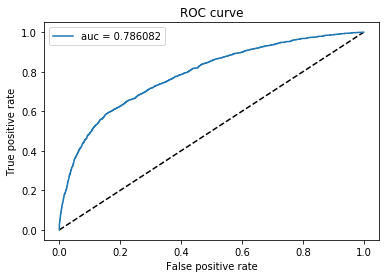

In [35]:
#ROC curve
from sklearn.metrics import roc_curve
y_proba = final_model.predict_proba(x_test_use)[:, 1]
auc = roc_auc_score(y_test, y_proba)
fpr_, tpr_, _ = roc_curve(y_test, y_proba)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_, tpr_, label='auc = %f'%(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()

## 2. 混淆矩陣

accuracy: 0.783, precision: 0.52, recall: 0.59, f1: 0.55


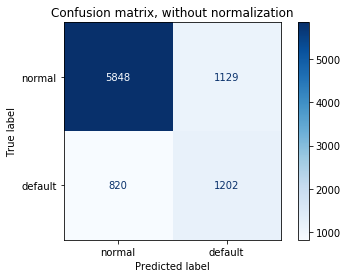

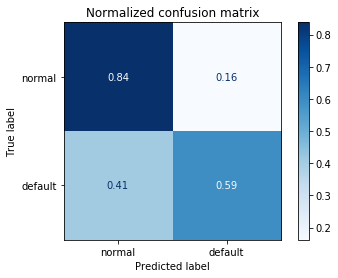

In [36]:
# 混淆矩陣
from sklearn.metrics import plot_confusion_matrix

accuracy = results_RF['accuracy'].iloc[0]
f1 = results_RF['f1'].iloc[0]
precision = results_RF['precision'].iloc[0]
recall = results_RF['recall'].iloc[0]
print('accuracy: %.3f, precision: %.2f, recall: %.2f, f1: %.2f'%(accuracy, precision, recall, f1) )
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(final_model, x_test_use, y_test,
                                 display_labels=['normal', 'default'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

## 3. PR 曲線

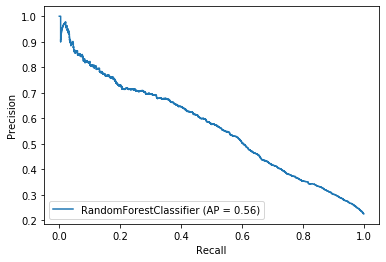

In [37]:
# Precision-Recall curve
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(final_model, x_test_use, y_test)

# 匯出預測結果

In [38]:
y_pred = pd.Series(final_model.predict(x_test_use), name = 'y_pred')
y_pred.index = x_test['ID']

y_proba = pd.Series(final_model.predict_proba(x_test_use)[:,1], name = 'y_proba')
y_proba.index = x_test['ID']

result = pd.concat([y_pred, y_proba], axis = 1)
result.to_csv('test_data_predict_result.csv')
result.head()


,y_pred,y_proba
ID,,
18213,0,0.498968
3155,0,0.434982
15571,1,0.906157
22392,1,0.685662
16226,0,0.267096


# 附錄 - 檢視隨機森林變數重要性

In [39]:
feature_importance = final_model.feature_importances_
feature_importance_table = pd.DataFrame({'Variable' : x_train_use.columns,
                                         'Feature_Importance' : feature_importance})
feature_importance_table.sort_values('Feature_Importance', ascending = False)

,Variable,Feature_Importance
2,PAY_0,0.178533
3,PAY_2,0.082483
15,LIMIT_USE1,0.049636
4,PAY_3,0.047855
0,LIMIT_BAL,0.043606
9,PAY_AMT1,0.042357
10,PAY_AMT2,0.042137
8,BILL_AMT1,0.038533
5,PAY_4,0.037547
18,PAY_PER1,0.036357


# 附錄 - 檢視決策樹規則

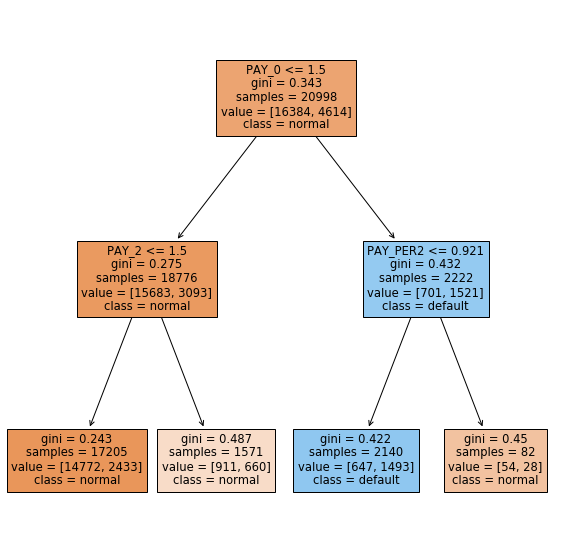

In [40]:
from sklearn.tree import plot_tree
model = DecisionTreeClassifier(max_depth = 2, random_state = 100)
model.fit(x_train_use, y_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10))
plot_tree(model, 
          feature_names = x_train_use.columns, 
          class_names=['normal', 'default'],
          filled = True)    
fig.savefig('decision_tree.png')
# 左True, 右False